### Getting started with DIPY

This example follows the tutorial listed [here](https://dipy.org/documentation/1.1.1./examples_built/quick_start/#example-quick-start). I am going to use a dataset form Openneuro (ds000114).

We can first put a variable name on one set of files so we can do some initial investigations.

In [24]:
fdwi = ('~/Desktop/neuro_tutorials/nipype_tutorial-master/data/dipy_tutorial/sub-01/ses-test/dwi/sub-01_ses-test_dwi.nii.gz')
fbval = ('~/Desktop/neuro_tutorials/nipype_tutorial-master/data/dipy_tutorial/dwi.bval')
fbvec = ('~/Desktop/neuro_tutorials/nipype_tutorial-master/data/dipy_tutorial/dwi.bvec')

In [10]:
print(fdwi)

/Users/u4307082/Desktop/neuro_tutorials/nipype_tutorial-master/data/dipy_tutorial/sub-01/ses-test/dwi/sub-01_ses-test_dwi.nii.gz


In [11]:
print(fbval)

/Users/u4307082/Desktop/neuro_tutorials/nipype_tutorial-master/data/dipy_tutorial/dwi.bval


In [12]:
print(fbvec)

/Users/u4307082/Desktop/neuro_tutorials/nipype_tutorial-master/data/dipy_tutorial/dwi.bvec


Let's start by first loading our dMRI datasets. For this we will need a python library called nibabel which enables us t read and write neuroimaging specific file formats.

In [2]:
from dipy.io.image import load_nifti
data, affine, img = load_nifti(fdwi, return_img=True)

So from this above command we create 'data' which is a 4D array, with the first 3 dimensions being the i, j and k voxel coordinates and the last demension being the number of non-seighted (S)s) and diffusion weighted volumes. We can check this using the following code.

In [4]:
print(data.shape)

(128, 128, 72, 71)


We can also look at the dimensions of each voxel in the following way.

In [5]:
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


We can use Matplotlib to look at the middle axial slices on volume 0 and volume 10. These images should show the middle axial slice without (left) and with (right) diffusion weighting.

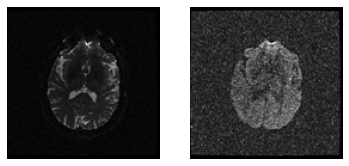

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:,:,axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2,).set_axis_off()
plt.imshow(data[:,:,axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')

The next step is to load the b-values and b-vectors from the disk using the function read_bvals_bvecs.

In [13]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In DIPY, we can use an object called GradientTable which holds all the acquisition specific parameters e.g. b-values, b-vectors, timings and others.

In [14]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

Finally, you can use gtab (the GradientTable object) to show some information about the acquisition parameters.

In [9]:
print(gtab.info)

None


We can also check the b-values using the following command:

In [15]:
print(gtab.bvals)

[   0.    0.    0.    0.    0.    0.    0. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


We can also look at the 2o first b-vectors with the following command:

In [18]:
print(gtab.bvecs[:10, :])

[[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [-1.     0.     0.   ]
 [-0.002  1.     0.   ]
 [ 0.026  0.649  0.76 ]]


Here we can use gtab to look at what part of the data is the S0 volumes (the volumes which correspond to b-values of 0).

In [20]:
S0s = data[:, :, :, gtab.b0s_mask]

We can see we have 7 S0s.

In [21]:
print(S0s.shape)

(128, 128, 72, 7)


We can use the save nifti to save this as a... NIFTI!

In [23]:
from dipy.io.image import save_nifti
save_nifti('sub-01_ses-test_s0.nii.gz', S0s, affine)

From this tutorial we have learned how to load dMRI datasets, and so now we are ready to start our analysis.